In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, precision_score


In [80]:
df_train = pd.read_csv('../data/financial-inclusion-in-africa/Train.csv')
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [81]:
print(df_train.info())
print('-'*100)
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None
-------------------------------------------------------

In [82]:
# checking for missing values
df_train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<AxesSubplot:>

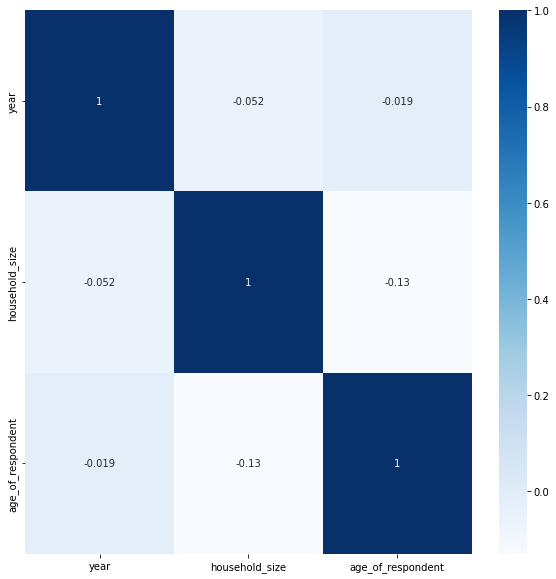

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),cbar=True,annot=True,cmap='Blues')

In [84]:
df_test = pd.read_csv('../data/financial-inclusion-in-africa/Train.csv')


df_test.cellphone_access = df_test.cellphone_access.map({'Yes': 1, 'No': 0})
df_test.bank_account = df_test.bank_account.map({'Yes': 1, 'No': 0})
df_test.location_type = df_test.location_type.map({'Rural': 1, 'Urban': 0})
df_test.gender_of_respondent = df_test.gender_of_respondent.map({'Female': 1, 'Male': 0})
df_test.drop('uniqueid', axis=1, inplace=True)
df_test

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,1,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,1,1,4,48,1,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,0,1,1,2,27,1,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,0,1,1,5,27,1,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,0,0,1,7,30,1,Parent,Divorced/Seperated,Secondary education,Self employed


<AxesSubplot:>

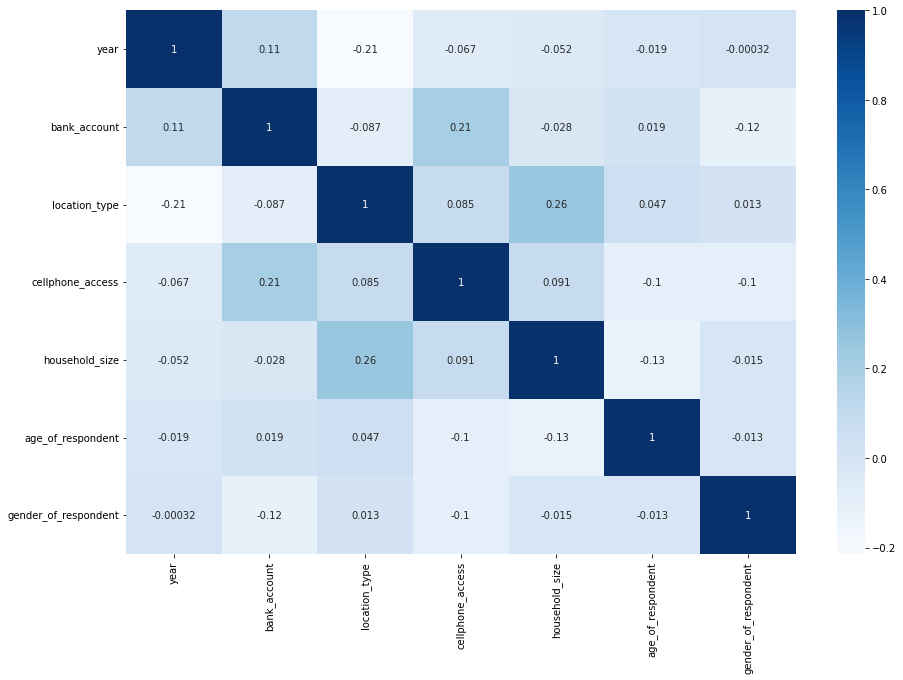

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test.corr(),cbar=True,annot=True,cmap='Blues')

<Figure size 3600x1800 with 0 Axes>

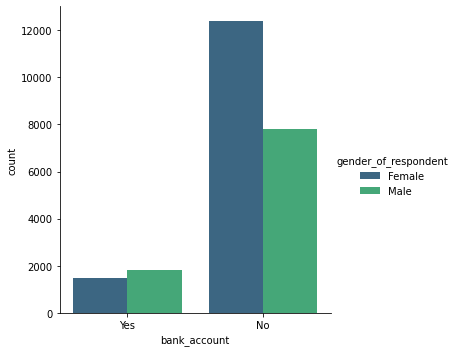

In [86]:
plt.figure(figsize=(50,25))
sns.catplot(x="bank_account",kind="count", hue="gender_of_respondent",palette="viridis", data=df_train)

In [98]:
df_train['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

<Figure size 3600x1800 with 0 Axes>

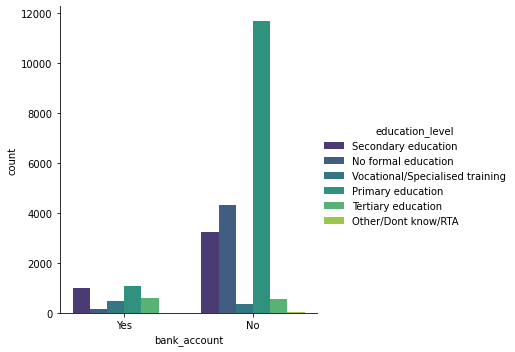

In [87]:
plt.figure(figsize=(50,25))
sns.catplot(x="bank_account",kind="count", hue="education_level",palette="viridis", data=df_train)

In [99]:
df_train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

<Figure size 3600x1800 with 0 Axes>

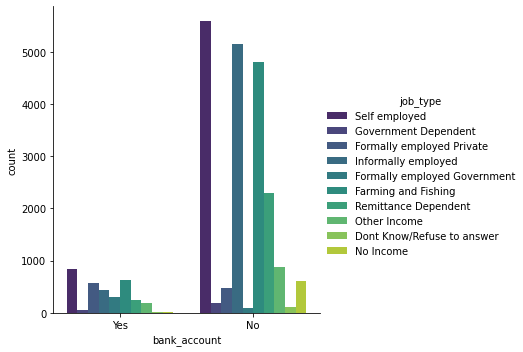

In [88]:
plt.figure(figsize=(50,25))
sns.catplot(x="bank_account",kind="count", hue="job_type",palette="viridis", data=df_train)

<Figure size 3600x1800 with 0 Axes>

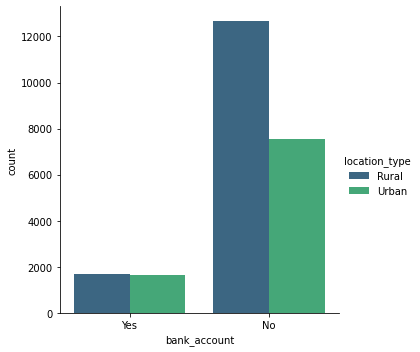

In [89]:
plt.figure(figsize=(50,25))
sns.catplot(x="bank_account",kind="count", hue="location_type",palette="viridis", data=df_train)

<Figure size 3600x1800 with 0 Axes>

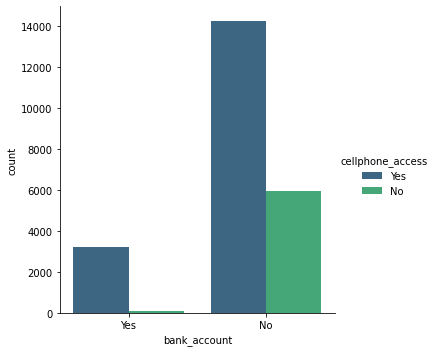

In [90]:
plt.figure(figsize=(50,25))
sns.catplot(x="bank_account",kind="count", hue="cellphone_access",palette="viridis", data=df_train)

<Figure size 3600x1800 with 0 Axes>

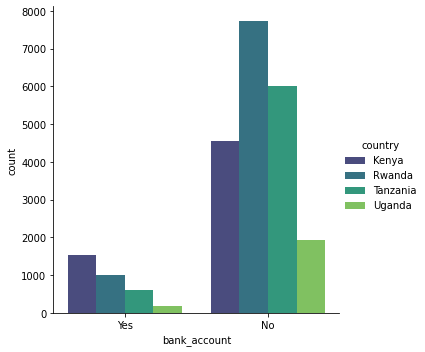

In [96]:
plt.figure(figsize=(50,25))
sns.catplot(x="bank_account",kind="count", hue="country",palette="viridis", data=df_train)

# baseline model

the first baseline model assumes that no person from the considered countries has a bank account. Based on that, the accuracy score, f1 score, recall and precision is calculated.

accuray: 0.859207617752083
f1 score: 0.0
recall: 0.0
precision: 0.0


/Users/tirsin/Documents/neuefische/financial_inclusion/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

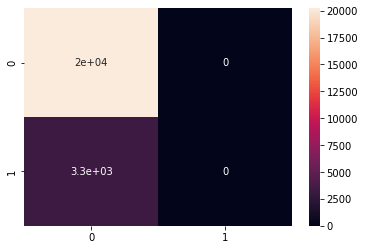

In [122]:
y_true = df_test.bank_account
y_pred_bl_1 = [0 for i in range(len(y_true))]

accuracy_bl_1 = accuracy_score(y_true, y_pred_bl_1)
f1_bl_1 = f1_score(y_true, y_pred_bl_1)
recall_bl_1 = recall_score(y_true, y_pred_bl_1)
precision_bl_1 = precision_score(y_true, y_pred_bl_1)

print(f'accuray: {accuracy_bl_1}')
print(f'f1 score: {f1_bl_1}')
print(f'recall: {recall_bl_1}')
print(f'precision: {precision_bl_1}')

cm_bl_1 = confusion_matrix(y_true, y_pred_bl_1)
sns.heatmap(cm_bl_1, annot=True)

# Splitting data into training and test set

In [95]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe.feature_to_encode)
    original_dataframe.drop(feature_to_encode, axis=1, inplace=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    return (res)

In [92]:
# one hot encoding of categorical data


,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,2018,1,1,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed
1,2018,0,1,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent
2,2018,1,0,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,2018,0,1,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,2018,0,0,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,1,1,4,48,1,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,2018,0,1,1,2,27,1,Head of Household,Single/Never Married,Secondary education,Other Income
23521,2018,0,1,1,5,27,1,Parent,Widowed,Primary education,Other Income
23522,2018,0,0,1,7,30,1,Parent,Divorced/Seperated,Secondary education,Self employed


In [93]:
# seperating features and the target
df_features = df_test.drop('bank_account', axis=1)
target = df_test.bank_account

X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.25, random_state=42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
